In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import pylab as plt
%matplotlib inline

In [57]:
df=pd.read_csv('./data/infectious.dat',sep=" ",header=None)

In [58]:
X=df.iloc[:,2:].values
y=np.array([x[1:4] for x in df.iloc[:,0]])
y=(y=='NEG')

In [59]:
Dp0=pd.DataFrame(X[~y,:])
Dn0=pd.DataFrame(X[y,:])
Dp0=Dp0.dropna()
Dn0=Dn0.dropna()

In [60]:
Dp0s=Dp0
Dn0s=Dn0.sample(Dp0s.index.size)
Dn0s=Dn0.sample(2000)


D=pd.concat([Dp0s,Dn0s])
X=D.values
y=np.append(np.zeros([Dp0s.index.size,1]),np.ones([Dn0s.index.size,1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

0.5810418063939191
0.5645002493594042
0.5699109185024678
0.5406262360487712
0.5522107000980241
0.5600311269325353


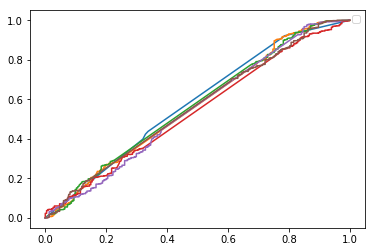

In [61]:
FPR=[]
TPR=[]
CLASSIFIERS=[DecisionTreeClassifier(max_depth=None, min_samples_split=2,
     random_state=0),
            RandomForestClassifier(n_estimators=500, max_depth=None,
  min_samples_split=2),
            ExtraTreesClassifier(n_estimators=500, max_depth=None,
     min_samples_split=2),
            AdaBoostClassifier(n_estimators=500),
            GradientBoostingClassifier(n_estimators=400,max_depth=4),
            SVC(gamma='scale', C=2.0,probability=True)]

for clf in CLASSIFIERS:
    clf.fit(X_train,y_train)
    y_pred=clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print auc
    
    plt.plot(fpr,tpr)
    plt.legend()
    FPR=np.append(FPR,fpr)
    TPR=np.append(TPR,tpr)

37301